# Řešení nelineárních rovnic a jejich soustav

Naimportujeme si knihovny potřebné pro následující příklady:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

- numerické řešení nelineární rovnice je vždy **iterační**
- řešení nejdříve **odhadneme**, pak ho postupně **zpřesňujeme**

## Řešení jedné nelineární rovnice

- řešíme $f(x)=0$ (řešení se často nazývá kořen)
- postup:
    1. ohraničení kořenů - určení intervalů, které obsahují jeden kořen
    - pokud pro $x_{1}<x_{2}$ platí, že $f(x_{1})f(x_{2})<0$, pak je v intervalu $(x_{1},x_{2})$ alespoň jeden kořen
    2. zpřesňování hodnoty kořene


### Metoda půlení intervalu (bisekce)
- postup
    1. nechť je kořen ohraničen $\langle a_{0},b_{0}\rangle$ tak, že platí $f(a_{0})f(b_{0})<0$
    2. vypočítáme $x_{1}=(a_{0}+b_{0})/2$
    3. jeden krajní bod ponecháme, druhý posuneme do $x_{1}$, aby opět platilo $f(a_{1})f(b_{1})<0$
- po $n$-tém kroku je kořen omezený body $a_{n}$ a $b_{n}$
- nepřesnost určení kořene: $\epsilon = \lvert b_{n}-a_{n}\rvert$, přičemž $\epsilon_{n+1}=\epsilon_{n}/2$
- spolehlivá metoda
- v blízkosti kořene pomalá

<div class="alert alert-block alert-warning"><b>Cvičení 06.01: </b> Najděte kořen rovnice $f(x)=0$, kde $f(x)=\exp(x)-6$, metodou půlení intervalu.</div>

koren=  1.791839599609375
chyba=  0.00030517578125
f(x)=0 pro x=  [1.79175947]


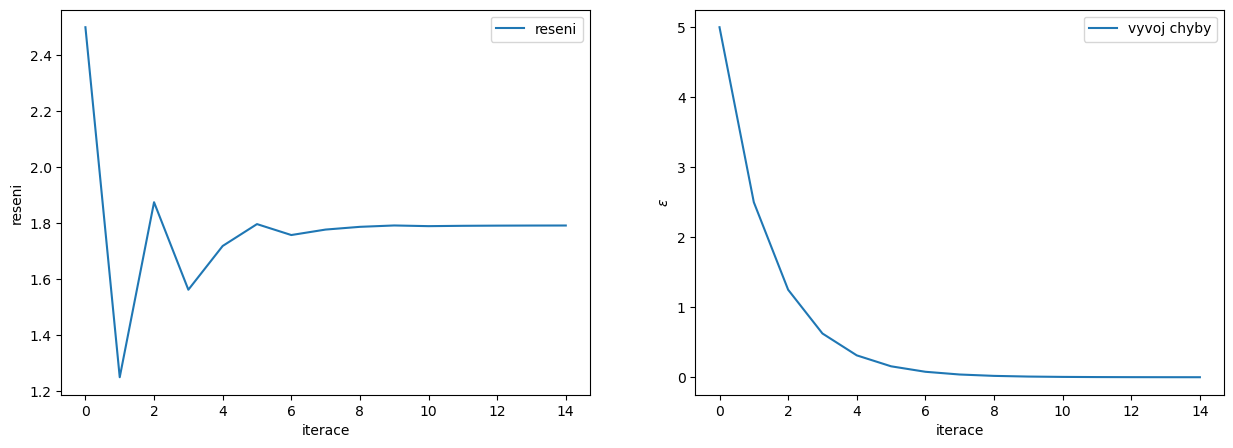

In [8]:
# metoda puleni intervalu

# demonstrace metody puleni intervalu pro nelinearni rovnice

# nadefinujeme f(x) a budeme hledat reseni f(x)=0
def f(x):
    return np.exp(x) - 6

#def g(x):
#    return np.sin(x)-0.5

iteraci = 15 # celkovy pocet iteraci

# pocatecni body omezujici reseni f(x)=0
a = 0 
b = 5
#b = 1

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = np.zeros((iteraci)) # odhad chyby, tedy delku intervalu <a,b> v jednotlivych krocich
reseni = np.zeros((iteraci)) # aktualni odhad reseni

for i in range(iteraci):
    c = (a+b)/2
    epsilon[i] = b-a
    reseni[i] = (a+b)/2
    if f(a)*f(c)<0:
        b = c
    else:
        a = c


koren = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby

print('koren= ', koren)
print('chyba= ', chyba)

fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend()

# overeni reseni
spravne_reseni = fsolve(f, a)
print('f(x)=0 pro x= ',spravne_reseni)

# grafy ukazuji, ze chyba urceni korene kazdym krokem klesa (bez nahlych zmen)

### Metoda sečny (sekantová)
- postup
    1. mějme body $a_{n-1}$ a $a_{n}$
    2. zvolíme $a_{n+1}$ v průsečíku spojnice bodů $\left(a_{n-1},y(a_{n-1})\right)$ a $\left(a_{n},y(a_{n})\right)$ s osou $x$
- konvergence **není** zaručena
- superlineární metoda

<div class="alert alert-block alert-warning"><b>Cvičení 06.02: </b> Najděte kořen rovnice $f(x)=0$, kde $f(x)=\exp(x)-6$, metodou sečny.</div>

koren=  1.791759469228055
chyba=  3.774758283725532e-15
f(x)=0 pro x=  [1.79175947]


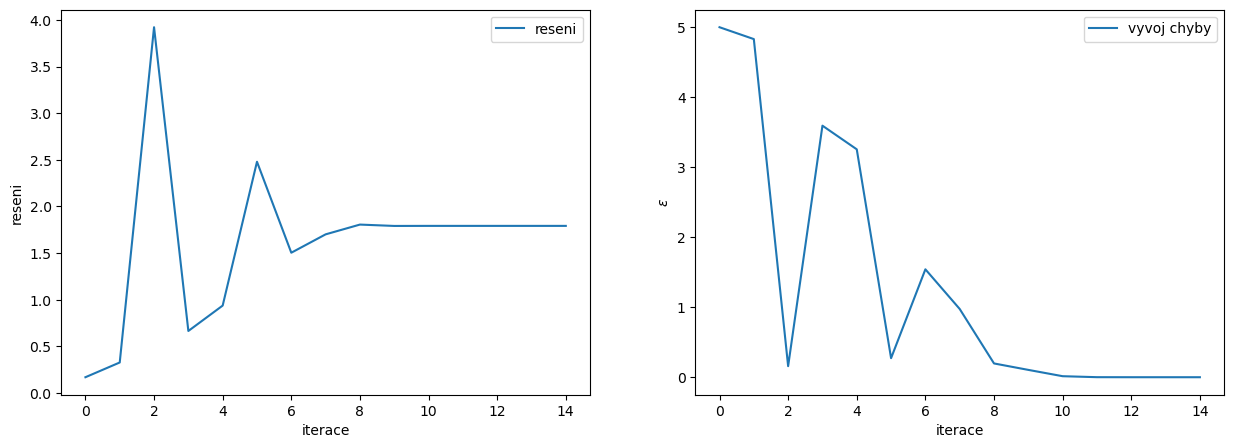

In [3]:
# metoda secen

#demonstrace metody secen pro nelinearni rovnice
#spolu s odhadem radu metody

#nadefinujeme f(x) a budeme hledat reseni f(x)=0
def f(x):
    return np.exp(x) - 6


iteraci = 15 # celkovy pocet iteraci


xi = 0 # pocatecni body omezujici reseni x(i)
xi_p1 = 5 # a x(i+1)

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = np.zeros((iteraci)) # odhad chyby, tedy rozdil poslednich dvou odhadu korene
reseni = np.zeros((iteraci)) # aktualni odhad reseni
a = xi_p1

for i in range(iteraci):
    c = (xi*f(xi_p1)-f(xi)*xi_p1)/(f(xi_p1)-f(xi))
    epsilon[i] = np.abs(xi-xi_p1)
    xi = xi_p1
    xi_p1 = c
    reseni[i] = c


koren = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby

print('koren= ', koren)
print('chyba= ', chyba)

fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend()

# overeni reseni
spravne_reseni = fsolve(f, a)
print('f(x)=0 pro x= ',spravne_reseni)

# grafy ukazuji, ze chyba urceni korene v prumeru klesa, ale mezi jednotlivymi kroky muze vyrazne vzrust 
# (rozdil oproti metode bisekce)
# po 15-te iteraci je chyba urceni korene o nekolik radu mensi nez v pripade metody bisekce

### Metoda regula falsi (tětiv)
- modifikace metody sečen
- po určení $a_{n+1}$ si k němu vyberu z $a_{n-1}$ a $a_{n}$ takový bod $\tilde{a}_{n}$, aby kořen zůstal ohraničený, tj. $f(\tilde{a}_{n})f(a_{n+1})<0$
- konvergence **je** zaručena
- superlineární metoda, ale pomalejší než sekantová

### Newton–Raphsonova (tečnová) metoda
- využívá první derivaci zadané funkce (je vhodná, pokud umíme hodnoty derivací rychle počítat)
- Taylorův rozvoj zadané funkce v okolí bodu $x_{i}$:
$f(x_{i}+\delta)=f(x_{i})+\delta f'(x_{i})+\dfrac{\delta^{2}}{2}f''(x_{i})+\dots$
- vypočítáme $\delta$ z podmínky $f(x)=0$
- iterační vzorec: $x_{i+1}=x_{i}-\dfrac{f(x_{i})}{f'(x_{i})}$ 
- konvergence není zaručena
- kvadratická metoda, rychlá blízko u kořene

<div class="alert alert-block alert-warning"><b>Cvičení 06.03: </b> Najděte kořen rovnice $f(x)=0$, kde $f(x)=\exp(x)-6$, tečnovou metodou.</div>

koren=  1.791759469228055
chyba=  0.0
f(x)=0 pro x=  [1.79175947]


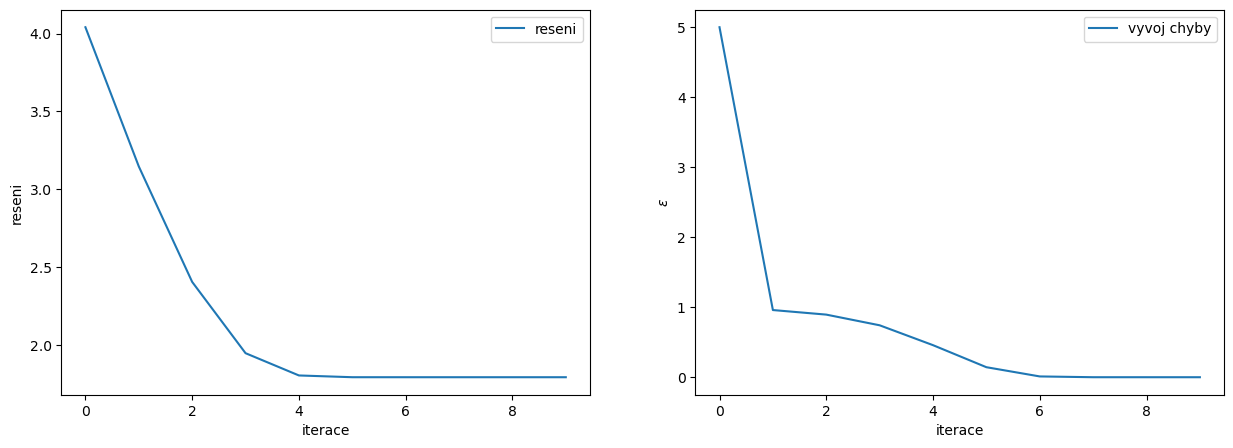

In [5]:
# metoda tecny


#demonstrace metody tecen pro nelinearni rovnice
#spolu s odhadem radu metody

# nadefinujeme f(x) a budeme hledat reseni f(x)=0
def f(x):
    return np.exp(x) - 6

# derivace
def df(x):
    return np.exp(x)

iteraci=10 # celkovy pocet iteraci

xi = 0 # pocatecni body omezujici reseni x(i)
xi_p1 = 5 # a x(i+1)

# budeme si prubezne ukladat odhad reseni a chybu odhadu
epsilon = np.zeros((iteraci)) # odhad chyby, tedy rozdil poslednich dvou odhadu korene
reseni = np.zeros((iteraci)) # aktualni odhad reseni

for i in range(iteraci):
    c = xi_p1-f(xi_p1)/df(xi_p1)
    epsilon[i] = np.abs(xi-xi_p1)
    xi = xi_p1
    xi_p1 = c
    reseni[i] = c

    
koren = reseni[-1] # odhad konecneho reseni
chyba = epsilon[-1] # odhad konecne chyby

print('koren= ', koren)
print('chyba= ', chyba)

fig, ax = plt.subplots(1,2,figsize=(15,5))

# zobrazime vyvoj reseni v zavislosti na iteracich
ax[0].plot(range(iteraci),reseni,label='reseni')
ax[0].set_ylabel('reseni')
ax[0].set_xlabel('iterace')
ax[0].legend()

# zobrazime vyvoj chyby v zavislosti na iteracich
ax[1].plot(range(iteraci),epsilon,label='vyvoj chyby')
ax[1].set_ylabel(r'$\epsilon$')
ax[1].set_xlabel('iterace')
ax[1].legend()

# overeni reseni
spravne_reseni = fsolve(f, a)
print('f(x)=0 pro x= ',spravne_reseni)

# chyba urceni korene je po 10-te iteraci (temer) nulova, zatimco u prechozich metod je zaznamenana nenulova chyba

### Mullerova metoda
- [teorie](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/05_nelin/DOCS/teorie_Mullerova_metoda.pdf)

<div class="alert alert-block alert-warning"><b>Cvičení 06.04: </b> Najděte kořen rovnice $f(x)=0$, kde $f(x)=4x^{3}-2x^{2}-4x-3$, Mullerovou metodou.</div>

In [4]:
# Mullerova metoda

def f(x):
    return  4*x**3 - 2*x**2 - 4*x - 3

# pozadovana presnost
presnost = 1.0e-6

n = 1

# známe 3 body a odpovídající 3 funkční hodnoty
x1 = 1
x2 = 2
x3 = 1.1
y1 = f(x1)
y2 = f(x2)
y3 = f(x3)

while (np.abs(y3) > presnost): # predpokladame, ze treti bod je nejblize reseni
    print('Krok ', n ,', koren ', x3 ,', hodnota ', y3)
    # hodnoty y1, y2, y3 prolozime Lagrangeovym polynomem, coz lze zapsat jako L(x)=A*x^2 + B*x + C
    a1 = y1/((x1-x2)*(x1-x3))
    a2 = y2/((x2-x1)*(x2-x3))
    a3 = y3/((x3-x1)*(x3-x2))
    A = a1+a2+a3
    C = x2*x3*a1 + x1*x3*a2 + x1*x2*a3
    B = -(x2+x3)*a1 -(x1+x3)*a2 -(x1+x2)*a3

    # hledame reseni L(x) = 0
    xn = (-B+np.sqrt(B*B-4*A*C))/(2*A)
    xn0 = (-B-np.sqrt(B*B-4*A*C))/(2*A)

    # z korenu vybereme ten, ktery je blizsi k x3
    if np.abs(xn0-x3)<np.abs(xn-x3):
        xn = xn0
    
    # iteracni predpis
    x1 = x2
    x2 = x3
    x3 = xn
    y1 = y2
    y2 = y3
    y3 = f(xn)

    n = n+1
    


Krok  1 , koren  1.1 , hodnota  -4.495999999999999
Krok  2 , koren  1.477368012283372 , hodnota  -0.3765948503327685
Krok  3 , koren  1.4989824007500905 , hodnota  -0.0172826233316572
Krok  4 , koren  1.5000021724002786 , hodnota  3.6930880244590014e-05


## Soustavy nelineárních rovnic

- řešíme soustavu $\vec{f}(\vec{x})=\vec{0}$
- přepíšeme ji do tvaru:

$$
f_{1}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
f_{2}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
f_{3}(x_{1},x_{2},\dots,x_{n})=0,
$$
$$
\vdots
$$
$$
f_{n}(x_{1},x_{2},\dots,x_{n})=0.
$$

### Prostá iterace

- soustavu lze přepsat do tvaru $\vec{x}=\vec{\varphi}(\vec{x})$:

$$
x_{1}=\varphi_{1}(\vec{x}),
$$


$$
x_{2}=\varphi_{2}(\vec{x}),
$$

$$
x_{3}=\varphi_{3}(\vec{x}),
$$

$$
\vdots
$$

$$
x_{n}=\varphi_{n}(\vec{x}).
$$

- soustava má **stejné** řešení jako původní soustava nelineárních rovnic
- iterační vzorec: $\vec{x}^{(k+1)}=\vec{\varphi}(\vec{x}^{k})$

<div class="alert alert-block alert-warning"><b>Cvičení 06.05: </b> Pomocí iterační metody najděte řešení soustavy nelineárních rovnic $$x^{2}+4x-y^{2}-2y-1=0,$$ $$x^{2}+5y-4=0.$$</div>

In [11]:
#
# reseni soustavy nelinearnich rovnic metodou proste iterace

# puvodni rovnice f1, f2
def f1(x,y):# f1(x,y) = 0
    return x**2 + 4*x - y**2 - 2*y -1

def f2(x,y): # f2(x,y) = 0
    return x**2 + 5*y -4

# parametricke vyjadreni x,y
def phi1(x,y): # x = phi1(x,y)
    return (y**2 + 2*y +1 -x**2)/4

def phi2(x,y): # y = phi2(x,y)
    return (4-x**2)/5

n  = 20 # pocet kroku
x0 = 0  # pocatecni odhad x
y0 = 0  # pocatecni odhad y

for i in range(n):
    #zobrazeni aktualni velikosti x,y a hodnot f1, f2 v danych bodech
    print('Krok ', i ,', (x0, y0)=(', x0 ,',', y0 ,')')
    print('Krok ', i ,', f1(x0, y0)= ', f1(x0,y0))
    print('Krok ', i ,', f2(x0, y0)= ', f2(x0,y0))
    #iteracni krok - vypocet z parametrickych rovnic
    xn = phi1(x0,y0)
    yn = phi2(x0,y0)
    x0 = xn
    y0 = yn

# vypis funkcnich hodnot ukazuje na nalezeni relativne presneho reseni 
# (funkcni hodnoty f(x0,y0) jsou po 20-te iteraci velmi blizke pozadovane nule)

Krok  0 , (x0, y0)=( 0 , 0 )
Krok  0 , f1(x0, y0)=  -1
Krok  0 , f2(x0, y0)=  -4
Krok  1 , (x0, y0)=( 0.25 , 0.8 )
Krok  1 , f1(x0, y0)=  -2.1775
Krok  1 , f2(x0, y0)=  0.0625
Krok  2 , (x0, y0)=( 0.794375 , 0.7875 )
Krok  2 , f1(x0, y0)=  0.6133753906250006
Krok  2 , f2(x0, y0)=  0.5685316406250003
Krok  3 , (x0, y0)=( 0.64103115234375 , 0.6737936718749999 )
Krok  3 , f1(x0, y0)=  0.17346029164136123
Krok  3 , f2(x0, y0)=  -0.2201107023498441
Krok  4 , (x0, y0)=( 0.5976660794334097 , 0.7178158123449687 )
Krok  4 , f1(x0, y0)=  -0.20302210490346306
Krok  4 , f2(x0, y0)=  -0.053716195769853314
Krok  5 , (x0, y0)=( 0.6484216056592755 , 0.7285590514989394 )
Krok  5 , f1(x0, y0)=  0.026220606803941893
Krok  5 , f2(x0, y0)=  0.06324583618045043
Krok  6 , (x0, y0)=( 0.64186645395829 , 0.7159098842628494 )
Krok  6 , f1(x0, y0)=  0.03511162963920467
Krok  6 , f2(x0, y0)=  -0.00845803396876299
Krok  7 , (x0, y0)=( 0.633088546548489 , 0.7176014910566021 )
Krok  7 , f1(x0, y0)=  -0.01699958811502

### Newton–Raphsonova metoda

- přesné řešení $\vec{\xi}$ vyjádříme ve tvaru $\vec{\xi}=\vec{x}+\delta\vec{x}$
- hodnotu funkce v bodě $\vec{\xi}$ vyjádříme pomocí Taylorovy věty:
$f_{i}(\vec{x}+\delta\vec{x})=f_{i}(\vec{x})+\sum_{j=1}^{n}\dfrac{\partial f_{i}}{\partial x_{j}}\delta x_{j}+\mathcal{O}(\delta \vec{x}^{2})$
- zanedbáním $\mathcal{O}(\delta \vec{x}^{2})$ získáme:
$f_{i}(\vec{x}+\delta\vec{x})=f_{i}(\vec{x})+\sum_{j=1}^{n}\dfrac{\partial f_{i}}{\partial x_{j}}\delta x_{j}=0$
- řešíme tedy soustavu $n$ lineárních rovnic s neznámou $\delta \vec{x}$
- iterační vztah: $ x_{i}^{(k+1)}=x_{i}^{(k)}+ \delta x_{i}^{(k)}$

<div class="alert alert-block alert-warning"><b>Cvičení 06.06: </b> Pomocí Newton-Raphsonovy metody najděte řešení soustavy nelineárních rovnic $$x^{2}+4x-y^{2}-2y-1=0,$$ $$x^{2}+5y-4=0.$$</div>

In [7]:
#
# reseni soustavy nelinearnich rovnic Newton-Raphsonovou metodou

stupen = 2

# delka kroku
h = 0.01

# derivace funkce f podle x metodou centralni diference
def dfdx(f,x,y,h):
    return 1/(2*h) * ( f(x+h,y) - f(x-h,y) )

# derivace funkce f podle y metodou centralni diference
def dfdy(f,x,y,h):
    return 1/(2*h) * ( f(x,y+h) - f(x,y-h) )

# puvodni rovnice f1, f2
def f1(x,y):# f1(x,y) = 0
    return x**2 + 4*x - y**2 - 2*y - 1

def f2(x,y):# f2(x,y) = 0
    return x**2 + 5*y - 4

# pocet iteraci
n = 20

# pocatecni odhad
x0 = 1
y0 = 1

# matice A a prava strana b pro soustavu linearnich rovnic
A = np.zeros((stupen,stupen))
#b = np.array((stupen,1))
b = np.array((stupen,1), dtype='float')
#b = np.zeros(stupen) # tato inicializace by byvala byla asi nejlepsi, vyhneme se problemum s datovym typem

for i in range(n):
    print('Krok ', i ,', (x0, y0)=(', x0 ,',', y0 ,')')
    print('Krok ', i ,', f1(x0, y0)= ', f1(x0,y0))
    print('Krok ', i ,', f2(x0, y0)= ', f2(x0,y0))
    
    A[0,0] = dfdx(f1,x0,y0,h)  # prvky tzv. Jacobiho matice
    A[0,1] = dfdy(f1,x0,y0,h)
    A[1,0] = dfdx(f2,x0,y0,h)
    A[1,1] = dfdy(f2,x0,y0,h)

    b[0] = -f1(x0,y0)
    b[1] = -f2(x0,y0)

    # vypocitame neznamou
    dx = np.linalg.solve(A,b)

    # iteracni vztah
    x0 = x0 + dx[0]
    y0 = y0 + dx[1]

    print('Krok ', i ,', dx= ', dx)
    print('A=', A)
    print('b= ', b)

    
# POZOR!!!    
# pokud nedefinujeme u vektoru b dtype='float', tak vypis ukazuje, ze zpresnovani reseni konci po prvnim kroku, ackoliv nalezene reseni neni moc presne    
# pro danou soustavu nelinearnich rovnic se pak metoda zda jako neprilis vhodna
# nicmene pokud explicitne nastavime datovy typ slozek vektoru b na 'float', tak je metoda presnejsi nez metoda proste iterace (a rychleji konverguje k presnejsimu reseni)

Krok  0 , (x0, y0)=( 1 , 1 )
Krok  0 , f1(x0, y0)=  1
Krok  0 , f2(x0, y0)=  2
Krok  0 , dx=  [-0.34210526 -0.26315789]
A= [[ 6. -4.]
 [ 2.  5.]]
b=  [-1. -2.]
Krok  1 , (x0, y0)=( 0.6578947368421049 , 0.7368421052631572 )
Krok  1 , f1(x0, y0)=  0.04778393351800614
Krok  1 , f2(x0, y0)=  0.11703601108032835
Krok  1 , dx=  [-0.02072149 -0.01795418]
A= [[ 5.31578947 -3.47368421]
 [ 1.31578947  5.        ]]
b=  [-0.04778393 -0.11703601]
Krok  2 , (x0, y0)=( 0.6371732465891273 , 0.7188879267978749 )
Krok  2 , f1(x0, y0)=  0.00010702763394121462
Krok  2 , f2(x0, y0)=  0.00042938015830351617
Krok  2 , dx=  [-6.54008973e-05 -6.92073508e-05]
A= [[ 5.27434649 -3.43777585]
 [ 1.27434649  5.        ]]
b=  [-0.00010703 -0.00042938]
Krok  3 , (x0, y0)=( 0.6371078456917931 , 0.718818719447048 )
Krok  3 , f1(x0, y0)=  -5.123796942285708e-10
Krok  3 , f2(x0, y0)=  4.277277199093987e-09
Krok  3 , dx=  [-3.94838661e-10 -7.54833516e-10]
A= [[ 5.27421569 -3.43763744]
 [ 1.27421569  5.        ]]
b=  [ 5.12

## Úloha 6.C

<div class="alert alert-block alert-warning"><b>Úloha 6.C: </b> Máme naměřeny účinné průřezy $g(E_i)$ s chybami $\sigma_i$ pro rezonanční rozptyl neutronů závisející na kinetické energii neutronů $E_i$. Víme, že závislost účinného průřezu na energii lze obecně popsat vztahem $f(E)=\dfrac{a1}{(E-a2)^2+a3}$, kde a1, a2, a3 jsou neznámé parametry. Aproximací metodou nejmenších čtverců určete neznámé parametry a1, a2, a3 ve fitovací funkci při zohlednění chyb měření účinných průřezů pro jednotlivé kinetické energie neutronů (váhu "přesnosti" jednotlivých naměřených bodů počítejte jako $1/\sigma_i^2$ v chybové funkci). Pro stanovení parametrů a1 až a3 použijte ve výpočtu Newton-Raphsonovu metodu (vycházejte z její implementace ve Cvičení 06.06). Na výstupu vypište hodnoty vypočítaných parametrů a zobrazte jednotlivé body a jejich fitování pomocí $f(E)$ v grafu. Pro vyřešení této úlohy není povoleno používání implicitních funkcí z knihoven Pythonu pro fitování ani pro řešení soustavy nelineárních rovnic, na které tento problém vede (můžete však využít implementace ze Cvičení 06.06). Případné použití dalších implicitních funkcí Pythonu je povoleno. Tip: Parciální derivace chybové funkce (sumy rozdílů mezi naměřenými hodnotami a hodnotami vypočtenými fitovací funkcí $f(E)$ umocněnými na druhou) najdete vypočteny <a href="http://kfe.fjfi.cvut.cz/~psikal/anm/parcderUloha6C.pdf">zde</a>. Tyto derivace, které pro hledání minima chybové funkce položíme rovny 0, tvoří základ pro soustavu nelineárních rovnic, jež musíme dále vyřešit. Důležitý je také počáteční odhad řešení soustavy, který by měl být co nejpřesnější (jinak Newton-Raphsonova metoda nemusí konvergovat ke správnému řešení). Ten stanovte porovnáním tvaru funkce $f(E)$ s grafem naměřených hodnot, ze kterého lze vyvodit např. to, že parametr $a2 \approx 75$ a poměr $a1/a3 \approx 100$. 
 </div>

In [ ]:
# namerene hodnoty definovany nize

E = np.array([0., 25., 50., 75., 100., 125., 150., 175., 200.])    # hodnoty kinetickych energii neutronu
gE = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])  # hodnoty namerenych ucinnych prurezu
sigma = np.array([9.34, 17.9, 41.5, 85.5, 51.5, 21.5, 10.8, 6.29, 4.14])  # hodnoty chyb mereni